In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/Datamining/TextMining/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [3]:
!cp "/content/drive/My Drive/Datamining/TextMining/Notebooks/functions.py" .
import functions as f
import importlib
importlib.reload(f)
f.v()

2020-05-30 14:50


In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from keras.initializers import Constant
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
import nltk
nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [6]:
df = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1mE-QcKMxy70Xt5OoVb8s0GqjS7jQiBD12WzxtmcNQck/edit#gid=1204809874');
df

,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,0.0,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,1.0,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,1.0,1.0
3,Pretty cool concept. 👍 $CHR #crypto #cryptocu...,True,NaN,NaN
4,"Crypto Market Hits $200 Billion, Bitcoin Ralli...",True,NaN,NaN
...,...,...,...,...
974,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,0.0,1.0
975,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,0.0,0.0
976,The last time BTC closed above 12k for the wee...,False,0.0,1.0
977,https://t.co/o5jXwqEdbn is for #sale!#domain #...,True,NaN,NaN


In [7]:
df_val = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1G0sY49Ct5AU3OAV-kVU1SSJP9_-ci8N0aCvX00e2Gkg/edit#gid=2038236874')
df_val

,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,0.0,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,0.0,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,0.0,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,0.0,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,0.0,1.0
...,...,...,...,...
293,@Crypto_Guy_UK you do understand China are inv...,False,0.0,-1.0
294,BTC/USD | $BTCUSD | $BTC $USD short Long or ...,True,NaN,NaN
295,#Blockchain #Crypto #Bitcoin #Ethereum #Tradin...,True,NaN,NaN
296,@CalvinAyre according to your mother bitcoin i...,False,0.0,1.0


In [8]:
# Esto fue para ver el texto antes de aplicar el normalize for tokenization
df.sample(n = 25, random_state=1234).text.values

array(['Bitcoin: Is the cryptocurrency back in a bull market? https://t.co/PH8QNOYhid',
       'Forgot about neo until yesterday 😁😆 #crypto #btc #neo',
       'https://t.co/zE0DCkP3az #xrp #ripple #trx #btc #"Zakir Musa\'s Death Ended New Idea Of Militancy In Kashmir": Top Cop - #Cricket   #CricketWorldCup2019 - https://t.co/bDrLoCsj27 #Jammu and Kashmir Director General of Police (DGP) Dilbag Singh said on Tuesday said ...',
       '@realDonaldTrump #Bitcoin will make America great again !',
       '#BitcoinCash price analysis: #BCH/USD consolidating in a flag after dropping from double top formation  https://t.co/yYjMbVzxrS',
       '#NUSD #kucoin #Arbitrage Opportunity 🚀! 1) Sell $BTC for $DAI. 2) Convert $DAI to $NUSD @ https://t.co/vnFMUCRCag. 3) Sell $NUSD for $TOMO. 4) Sell $TOMO for $BTC.  Potential 0.56% profit (#kucoin and @neutral_project fees included)! 2019-06-19 17:22:27 +0000',
       'Sensor Fusion and Estimation Software Engineer - CyberCoders - [ ➡ https://t.co/SofJzF

In [9]:
# Acá vemos como queda el texto después de aplicar el normalize for tokenization
df.sample(n = 25, random_state=1234).text.apply(f.normalizeForTokenization).values

array(['bitcoin: is the cryptocurrency back in a bull market? <URL>',
       'forgot about neo until yesterday 😁😆 <HASHTAG> <HASHTAG> <HASHTAG>',
       '<URL> <HASHTAG> <HASHTAG> <HASHTAG> <HASHTAG> #"zakir musa\'s death ended new idea of militancy in kashmir": top cop - <HASHTAG> <HASHTAG> - <URL> <HASHTAG> and kashmir director general of police (dgp) dilbag singh said on tuesday said \x01',
       '<MENTION> <HASHTAG> will make america great again !',
       '<HASHTAG> price analysis: <HASHTAG> /usd consolidating in a flag after dropping from double top formation <URL>',
       '<HASHTAG> <HASHTAG> <HASHTAG> opportunity 🚀! <NUMBER> ) sell $btc for $dai. <NUMBER> ) convert $dai to $nusd @<URL> <NUMBER> ) sell $nusd for $tomo. <NUMBER> ) sell $tomo for $btc. potential <NUMBER> % profit ( <HASHTAG> and <MENTION> fees included)! <NUMBER> - <NUMBER> - <NUMBER> <NUMBER> : <NUMBER> : <NUMBER> + <NUMBER>',
       'sensor fusion and estimation software engineer - cybercoders - [ ➡ <URL> ] <H

# Preparacion de datos para las RNN

In [0]:
x_dev_text = df['text'].apply(f.normalizeForTokenization)
y_dev = df['is_spam']
x_test_text = df_val['text'].apply(f.normalizeForTokenization)
y_test = df_val['is_spam']

In [0]:
vocab_size = 10000+1
embedding_dim = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
validation_size = 0.2

# Seteamos max_length teniendo en cuenta el largo promedio de los tweets
max_length = 50

In [0]:
x_train_text, x_validation_text, y_train, y_validation = train_test_split(x_dev_text, y_dev, test_size = validation_size, random_state=1234)

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train_text)
x_train = tokenizer.texts_to_sequences(x_train_text)
x_validation = tokenizer.texts_to_sequences(x_validation_text)
x_test = tokenizer.texts_to_sequences(x_test_text)

In [0]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_validation = pad_sequences(x_validation, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Naive Bayes

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_dev_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_test_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_dev)
pred = NB_model.predict(x_validation_NB)

In [16]:
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred)
}

{'accuracy': 0.7483221476510067,
 'f1': 0.6724890829694323,
 'recall': 0.6637931034482759}

In [17]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[146,  36],
       [ 39,  77]], dtype=int32)>

Por las dudas pruebo NB validando contra "validación" (en lugar de test)

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_train_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_validation_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_train)
pred = NB_model.predict(x_validation_NB)

In [19]:
{
    'f1' : f1_score(y_validation, pred),
    'accuracy': accuracy_score(y_validation, pred),
    'recall': recall_score(y_validation, pred)
}

{'accuracy': 0.7142857142857143,
 'f1': 0.6164383561643836,
 'recall': 0.6818181818181818}

# RNN

In [20]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           3000300   
_________________________________________________________________
gru (GRU)                    (None, 128)               165120    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model_gru.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
8/8 [==============================] - 1s 80ms/step - loss: 0.6701 - accuracy: 0.6015 - val_loss: 0.6425 - val_accuracy: 0.6633
Epoch 2/15
8/8 [==============================] - 0s 34ms/step - loss: 0.6515 - accuracy: 0.6513 - val_loss: 0.6420 - val_accuracy: 0.6633
Epoch 3/15
8/8 [==============================] - 0s 36ms/step - loss: 0.6508 - accuracy: 0.6513 - val_loss: 0.6422 - val_accuracy: 0.6633
Epoch 4/15
8/8 [==============================] - 0s 34ms/step - loss: 0.6485 - accuracy: 0.6526 - val_loss: 0.6410 - val_accuracy: 0.6633
Epoch 5/15
8/8 [==============================] - 0s 37ms/step - loss: 0.6476 - accuracy: 0.6526 - val_loss: 0.6402 - val_accuracy: 0.6633
Epoch 6/15
8/8 [==============================] - 0s 33ms/step - loss: 0.6458 - accuracy: 0.6539 - val_loss: 0.6408 - val_accuracy: 0.6633
Epoch 7/15
8/8 [==============================] - 0s 33ms/step - loss: 0.6431 - accuracy: 0.6539 - val_loss: 0.6388 - val_accuracy: 0.6633
Epoch 8/15
8/8 [===========

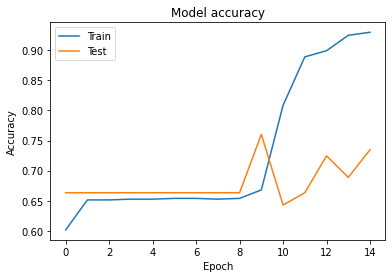

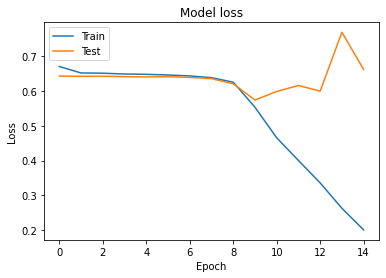

In [22]:
plot_history(history)

In [23]:
pred = model_gru.predict(x_test)
{
    'f1' : f1_score(y_test, pred[:,0] > 0.5),
    'accuracy': accuracy_score(y_test, pred[:,0] > 0.5),
    'recall': recall_score(y_test, pred[:,0] > 0.5)
}

{'accuracy': 0.7483221476510067,
 'f1': 0.6543778801843317,
 'recall': 0.6120689655172413}

In [24]:
tf.math.confusion_matrix(labels=y_test, predictions=(pred[:,0] > 0.5))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[152,  30],
       [ 45,  71]], dtype=int32)>

# RNN Bidireccional

In [25]:
model_bigru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           330240    
_________________________________________________________________
dropout (Dropout)            (None, 50, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [26]:
history = model_bigru.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
8/8 [==============================] - 1s 165ms/step - loss: 0.6659 - accuracy: 0.6347 - val_loss: 0.6321 - val_accuracy: 0.6633
Epoch 2/15
8/8 [==============================] - 0s 45ms/step - loss: 0.6251 - accuracy: 0.6526 - val_loss: 0.5876 - val_accuracy: 0.6684
Epoch 3/15
8/8 [==============================] - 0s 43ms/step - loss: 0.5077 - accuracy: 0.7599 - val_loss: 0.5331 - val_accuracy: 0.7194
Epoch 4/15
8/8 [==============================] - 0s 43ms/step - loss: 0.3117 - accuracy: 0.8863 - val_loss: 0.5925 - val_accuracy: 0.7551
Epoch 5/15
8/8 [==============================] - 0s 44ms/step - loss: 0.1508 - accuracy: 0.9476 - val_loss: 0.7399 - val_accuracy: 0.7194
Epoch 6/15
8/8 [==============================] - 0s 44ms/step - loss: 0.0931 - accuracy: 0.9732 - val_loss: 0.9028 - val_accuracy: 0.6888
Epoch 7/15
8/8 [==============================] - 0s 45ms/step - loss: 0.0653 - accuracy: 0.9745 - val_loss: 0.9908 - val_accuracy: 0.7245
Epoch 8/15
8/8 [==========

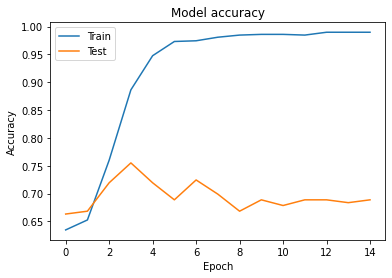

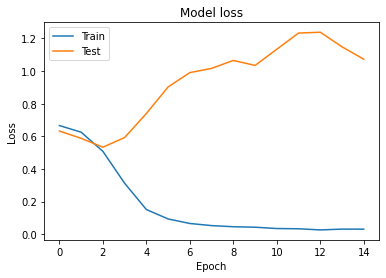

In [27]:
plot_history(history)

In [28]:
pred = model_bigru.predict(x_test)
{
    'f1' : f1_score(y_test, pred[:,0] > 0.5),
    'accuracy': accuracy_score(y_test, pred[:,0] > 0.5),
    'recall': recall_score(y_test, pred[:,0] > 0.5)
}

{'accuracy': 0.6677852348993288,
 'f1': 0.5787234042553192,
 'recall': 0.5862068965517241}

In [29]:
tf.math.confusion_matrix(labels=y_test, predictions=(pred[:,0] > 0.5))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[131,  51],
       [ 48,  68]], dtype=int32)>

# Embedding preentrenado

In [30]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

#load model
w2v_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

--2020-05-30 18:35:55--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  47.6MB/s    in 33s     

2020-05-30 18:36:29 (47.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# RNN con embedding preentrenado

In [31]:
model_gru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru_pre.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru_pre.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               165120    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model_gru_pre.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
8/8 [==============================] - 1s 80ms/step - loss: 0.6781 - accuracy: 0.6488 - val_loss: 0.6543 - val_accuracy: 0.6633
Epoch 2/15
8/8 [==============================] - 0s 38ms/step - loss: 0.6456 - accuracy: 0.6513 - val_loss: 0.6344 - val_accuracy: 0.6633
Epoch 3/15
8/8 [==============================] - 0s 33ms/step - loss: 0.6391 - accuracy: 0.6513 - val_loss: 0.6355 - val_accuracy: 0.6633
Epoch 4/15
8/8 [==============================] - 0s 34ms/step - loss: 0.6325 - accuracy: 0.6513 - val_loss: 0.6123 - val_accuracy: 0.6633
Epoch 5/15
8/8 [==============================] - 0s 35ms/step - loss: 0.5767 - accuracy: 0.6539 - val_loss: 0.5932 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 0s 33ms/step - loss: 0.5508 - accuracy: 0.7573 - val_loss: 0.5266 - val_accuracy: 0.7551
Epoch 7/15
8/8 [==============================] - 0s 34ms/step - loss: 0.4919 - accuracy: 0.7663 - val_loss: 0.5212 - val_accuracy: 0.7143
Epoch 8/15
8/8 [===========

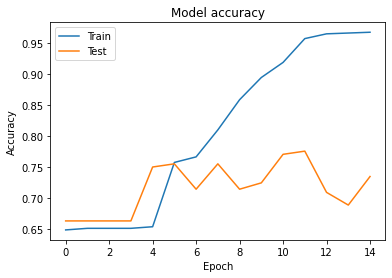

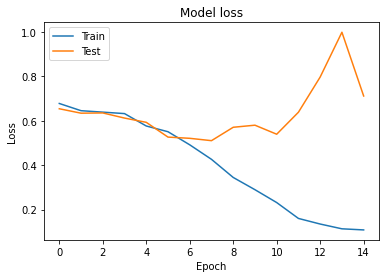

In [33]:
plot_history(history)

In [34]:
pred = model_gru_pre.predict(x_test)
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred)
}

{'accuracy': 0.7181208053691275,
 'f1': 0.5384615384615385,
 'recall': 0.4224137931034483}

In [35]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[165,  17],
       [ 67,  49]], dtype=int32)>

In [0]:
# Dejo comentado el código para guardar y cargar
#modelFileName = 'gru_pre_2020-05-30_1355'
#modelFullPath = path + 'Modelos/' + modelFileName
#model_gru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()

# RNN Bidireccional con embedding preentrenado

In [37]:
model_bigru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru_pre.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru_pre.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 256)           330240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [38]:
history = model_bigru_pre.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
8/8 [==============================] - 1s 163ms/step - loss: 0.6673 - accuracy: 0.6207 - val_loss: 0.6105 - val_accuracy: 0.6786
Epoch 2/15
8/8 [==============================] - 0s 44ms/step - loss: 0.5989 - accuracy: 0.6692 - val_loss: 0.5754 - val_accuracy: 0.7041
Epoch 3/15
8/8 [==============================] - 0s 45ms/step - loss: 0.5320 - accuracy: 0.7458 - val_loss: 0.5369 - val_accuracy: 0.7194
Epoch 4/15
8/8 [==============================] - 0s 43ms/step - loss: 0.4531 - accuracy: 0.7969 - val_loss: 0.4949 - val_accuracy: 0.7449
Epoch 5/15
8/8 [==============================] - 0s 44ms/step - loss: 0.3369 - accuracy: 0.8404 - val_loss: 0.4881 - val_accuracy: 0.7908
Epoch 6/15
8/8 [==============================] - 0s 45ms/step - loss: 0.2270 - accuracy: 0.9080 - val_loss: 0.6054 - val_accuracy: 0.7551
Epoch 7/15
8/8 [==============================] - 0s 44ms/step - loss: 0.1672 - accuracy: 0.9298 - val_loss: 0.6246 - val_accuracy: 0.7602
Epoch 8/15
8/8 [==========

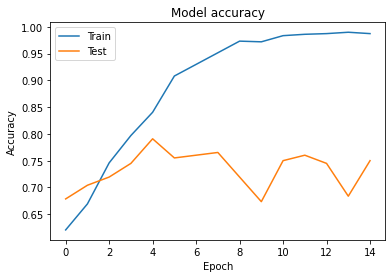

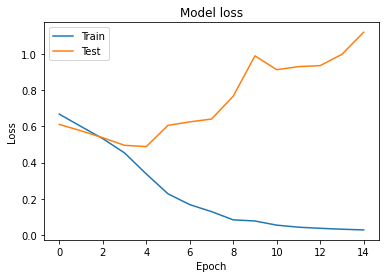

In [39]:
plot_history(history)

In [40]:
pred = model_bigru_pre.predict(x_test)
{
    'f1' : f1_score(y_test, pred[:,0] > 0.5),
    'accuracy': accuracy_score(y_test, pred[:,0] > 0.5),
    'recall': recall_score(y_test, pred[:,0] > 0.5)
}

{'accuracy': 0.7114093959731543,
 'f1': 0.6293103448275862,
 'recall': 0.6293103448275862}

In [41]:
tf.math.confusion_matrix(labels=y_test, predictions=(pred[:,0] > 0.5))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[139,  43],
       [ 43,  73]], dtype=int32)>

# RNN (también bidireccional) con embedding preentrenado y 5-fold cross validation

In [42]:
model_gru_pre_5fold = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru_pre_5fold.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru_pre_5fold.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_6 (GRU)                  (None, 128)               165120    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_bigru_pre_5fold = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru_pre_5fold.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru_pre_5fold.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 256)           330240    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [0]:
tokenizer_cv = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer_cv.fit_on_texts(x_dev_text)
x_dev_cv = tokenizer_cv.texts_to_sequences(x_dev_text)
x_test_cv = tokenizer_cv.texts_to_sequences(x_test_text)

In [0]:
x_dev_cv = pad_sequences(x_dev_cv, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test_cv = pad_sequences(x_test_cv, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [46]:
kf = KFold(5, shuffle = True, random_state=1234)
for train_cv, test_cv in kf.split(x_dev_cv):
    # Entreno las 2 redes simultaneamente :)
    model_gru_pre_5fold.fit(
        x_dev_cv[train_cv], y_dev[train_cv],
        batch_size=100, epochs=10,
        validation_data=(x_dev_cv[test_cv], y_dev[test_cv]))
    model_bigru_pre_5fold.fit(
        x_dev_cv[train_cv], y_dev[train_cv],
        batch_size=100, epochs=10,
        validation_data=(x_dev_cv[test_cv], y_dev[test_cv]))

Epoch 1/10
8/8 [==============================] - 1s 69ms/step - loss: 0.6821 - accuracy: 0.6437 - val_loss: 0.6640 - val_accuracy: 0.6633
Epoch 2/10
8/8 [==============================] - 0s 35ms/step - loss: 0.6523 - accuracy: 0.6513 - val_loss: 0.6427 - val_accuracy: 0.6633
Epoch 3/10
8/8 [==============================] - 0s 34ms/step - loss: 0.6413 - accuracy: 0.6513 - val_loss: 0.6417 - val_accuracy: 0.6633
Epoch 4/10
8/8 [==============================] - 0s 32ms/step - loss: 0.6367 - accuracy: 0.6513 - val_loss: 0.6400 - val_accuracy: 0.6633
Epoch 5/10
8/8 [==============================] - 0s 31ms/step - loss: 0.6325 - accuracy: 0.6526 - val_loss: 0.6300 - val_accuracy: 0.6582
Epoch 6/10
8/8 [==============================] - 0s 35ms/step - loss: 0.6039 - accuracy: 0.6731 - val_loss: 0.5453 - val_accuracy: 0.8112
Epoch 7/10
8/8 [==============================] - 0s 33ms/step - loss: 0.5210 - accuracy: 0.7625 - val_loss: 0.5552 - val_accuracy: 0.7041
Epoch 8/10
8/8 [===========

In [47]:
pred = model_gru_pre_5fold.predict(x_test_cv) 
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred)
}

{'accuracy': 0.7046979865771812, 'f1': 0.6, 'recall': 0.5689655172413793}

In [48]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[144,  38],
       [ 50,  66]], dtype=int32)>

In [49]:
pred = model_bigru_pre_5fold.predict(x_test_cv) 
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred)
}

{'accuracy': 0.7214765100671141,
 'f1': 0.6343612334801763,
 'recall': 0.6206896551724138}

In [50]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[143,  39],
       [ 44,  72]], dtype=int32)>